# Problem 1: Linear Regression

#### You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.



# Data Dictionary:
### Variable Name	: Description
### Carat	                : Carat weight of the cubic zirconia.
### Cut	                     : Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
### Color 	                : Colour of the cubic zirconia.With D being the best and J the worst.
### Clarity	                 : cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
### Depth	                : The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
### Table	                 : The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
### X	                        :  Length of the cubic zirconia in mm.
### Y	                        :  Width of the cubic zirconia in mm.
### Z	                        : Height of the cubic zirconia in mm.

### Dataset for Problem 1: cubic_zirconia.csv


# 1.1	Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). 

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [2]:
gem_df = pd.read_csv("cubic_zirconia.csv")
gem_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
gem_df = gem_df.drop("Unnamed: 0",axis = 1)
gem_df.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [4]:
gem_df.shape

(26967, 10)

In [5]:
gem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


# Inference
# The column “Unnamed : 0” is removed from the dataset before proceeding further as its insignificant for the analysis.
# There are 26967 rows and 10 columns
# There are null values in column "depth" and other columns have no null values

In [6]:
gem_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

# There are 6 float , 3 object and 1 interger datatypes

In [7]:
gem_df.describe(include="all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [8]:
# Inference
# Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents a dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.
# Carat
# Minimum Carat weight of the cubic zirconia is 0.200000
# Minimum Carat weight of the cubic zirconia is 4.500000
# depth :
# The minimum Height of a cubic zirconia: 50.8
# Average Height of a cubic zirconia:61.745
# price
# price in US dollars ($326--$18,818)This is the target column containing tags for the features. 
# There are 5 categories in cut variable
# There are 7 categories in color variable
# There are 8 categories in clarity variable

#### unique values for categorical variables

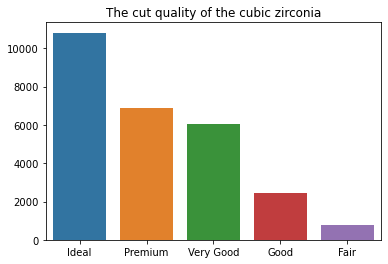

Ideal        0.401083
Premium      0.255831
Very Good    0.223607
Good         0.090518
Fair         0.028961
Name: cut, dtype: float64


In [9]:
sns.barplot(gem_df.cut.value_counts().index,gem_df.cut.value_counts().values)
plt.title("The cut quality of the cubic zirconia")
plt.show()
print(gem_df.cut.value_counts(normalize=True))

In [10]:
# Inference
# In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye. 
# Nearly 40% of diamonds in this dataset is Ideal which is the highest grader cut
# Premium grader cut diamonds is around 25%
# Around .02% of diamonds in this dataset is  Fair which is very lower grade cut
#


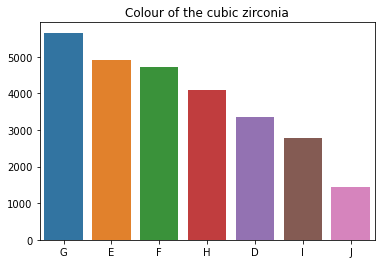

G    0.209923
E    0.182334
F    0.175362
H    0.152112
D    0.124003
I    0.102755
J    0.053510
Name: color, dtype: float64


In [11]:
sns.barplot(gem_df.color.value_counts().index,gem_df.color.value_counts().values)
plt.title("Colour of the cubic zirconia")
plt.show()
print(gem_df.color.value_counts(normalize=True))

In [12]:
# inference
# color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  
# Only 12.4% of "D" (actually colorless) which is considered as best color of diamond
# Only 5% of "J" which is considered as worst color of diamond

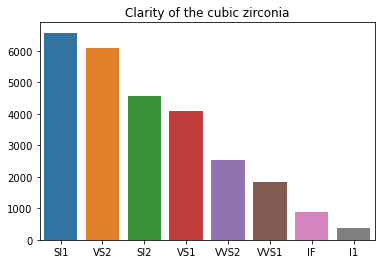

SI1     0.243668
VS2     0.226165
SI2     0.169652
VS1     0.151778
VVS2    0.093855
VVS1    0.068194
IF      0.033152
I1      0.013535
Name: clarity, dtype: float64


In [13]:
sns.barplot(gem_df.clarity.value_counts().index,gem_df.clarity.value_counts().values)
plt.title("Clarity of the cubic zirconia")
plt.show()
print(gem_df.clarity.value_counts(normalize=True))

In [14]:
# inference
# Clarity of the cubic zirconia("SI1")Slightly Included category : 24.3%
# Clarity of the cubic zirconia("IF")internally flawless category :3.3%

In [15]:
gem_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

# check for duplicates

In [4]:
dups = gem_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [5]:
print('Before',gem_df.shape)
gem_df.drop_duplicates(inplace=True) 
print('After',gem_df.shape)

Before (26967, 10)
After (26933, 10)


In [6]:
# inference
# These 34 rows are not exactly pure duplicates(two to three columns are always having different values), 
# but for the purpose of this project,we drop the duplicates .

# 1.2.	Perform Univariate and Bivariate Analysis.

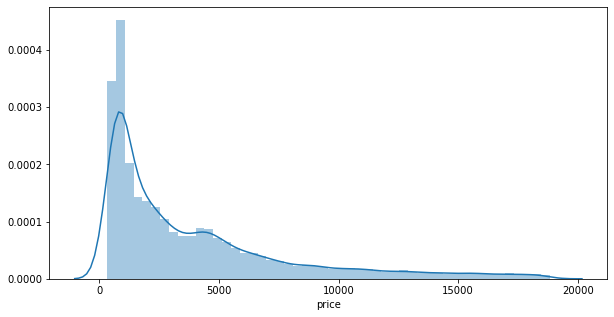

In [19]:
# Price Distribution
fig = plt.figure(figsize=(10, 5))
sns.distplot(gem_df['price'], kde=True)

In [20]:
# Inference
# Distribution of "price" variable left skewed

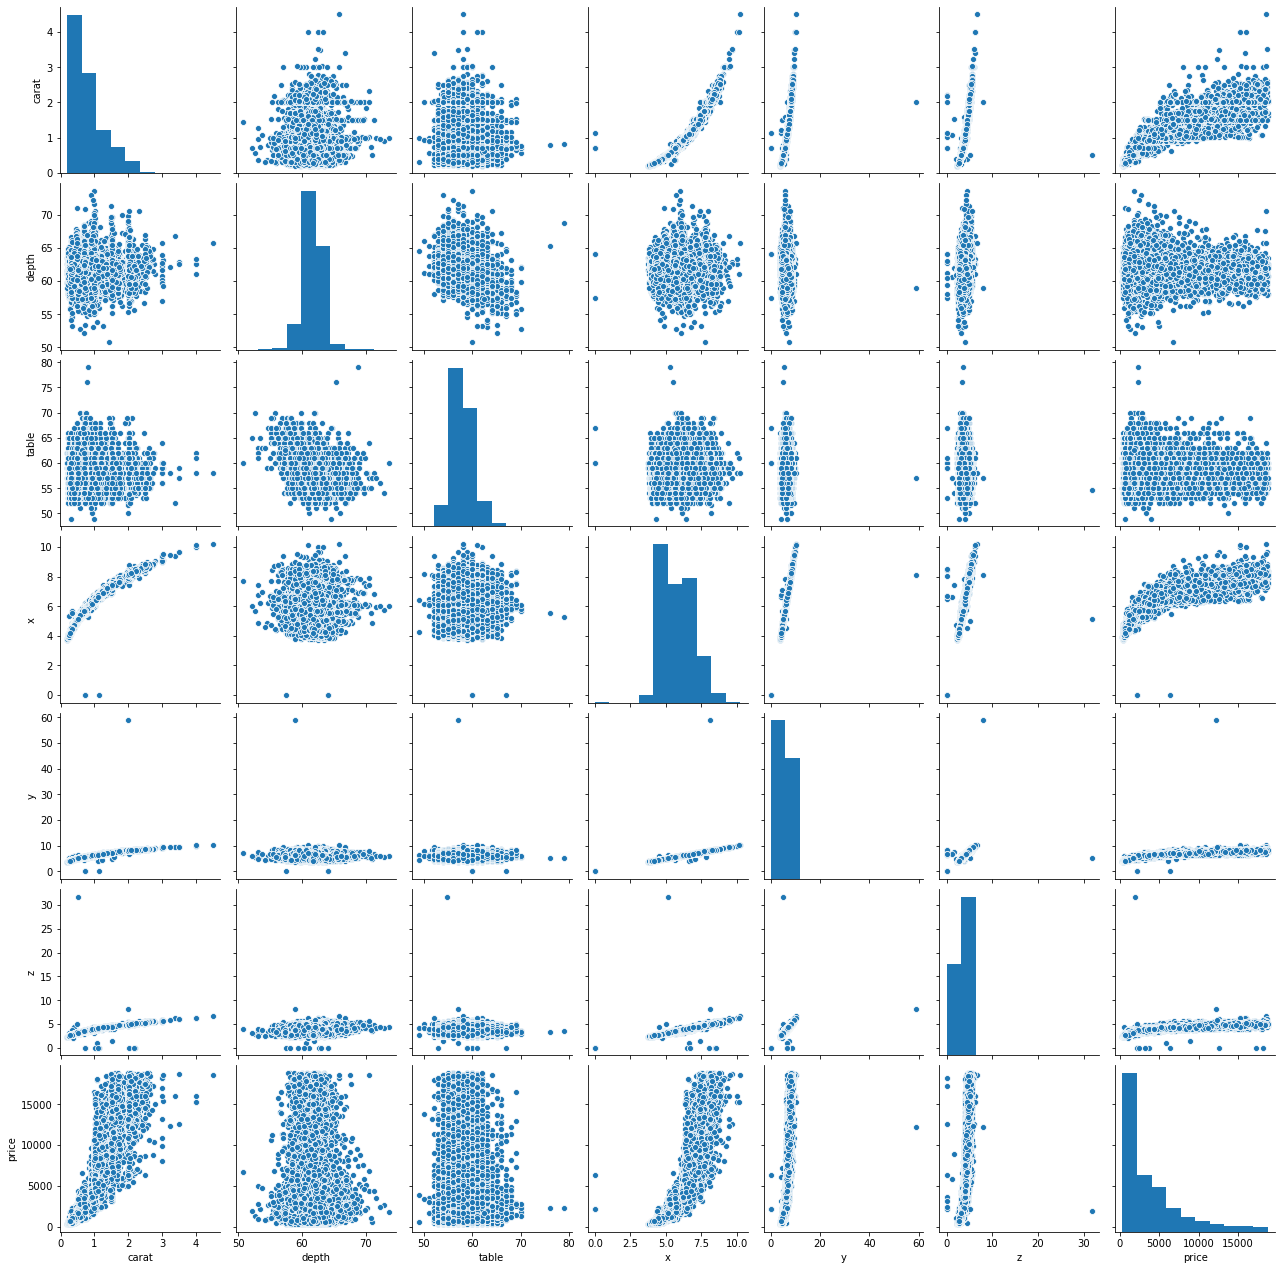

In [4]:
sns.pairplot(gem_df)

In [22]:
# Inference
# Price and carat has linear relationship .other varibales are either slight or no linear relationship seen 
# Looks like only "x" variable is normally distributed
# Other varibales are skewed


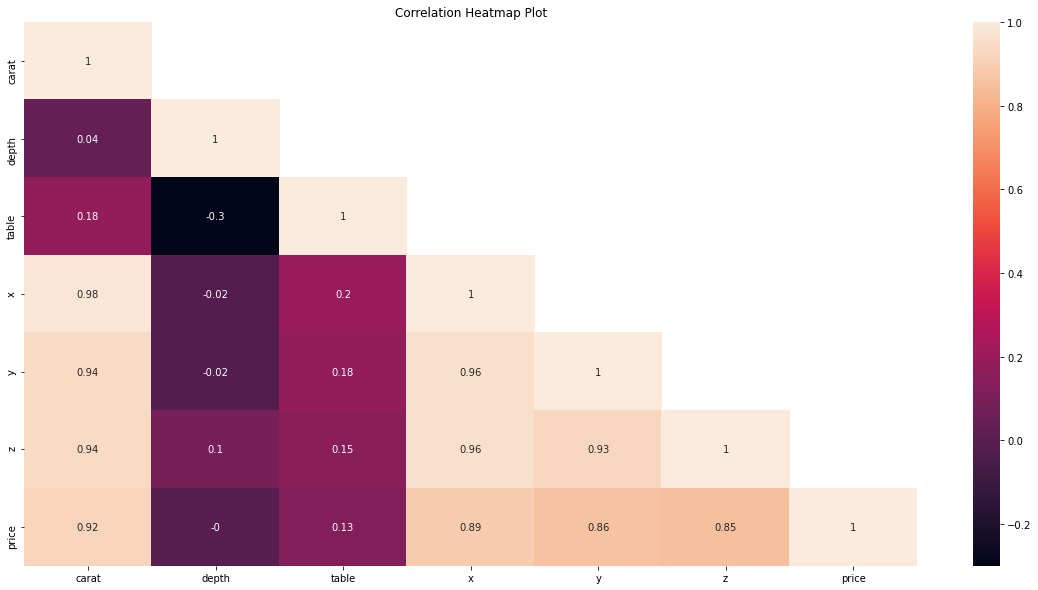

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(round(gem_df.corr(),2), annot=True,mask=np.triu(gem_df.corr(),+1));
plt.title('Correlation Heatmap Plot')
plt.show()

In [24]:
# Inference
# the variables "x","y","z" are highly correlated to "carat " variable
# The target variables is highly correlated (98%) with "carat" variable which shows us carat variable is very important feature
# "x","y" and "z" variables are highly correlated with each other
# Negative correlation is seen between table and depth (-0.3)

Text(0.5, 1.0, 'Color Vs Price')

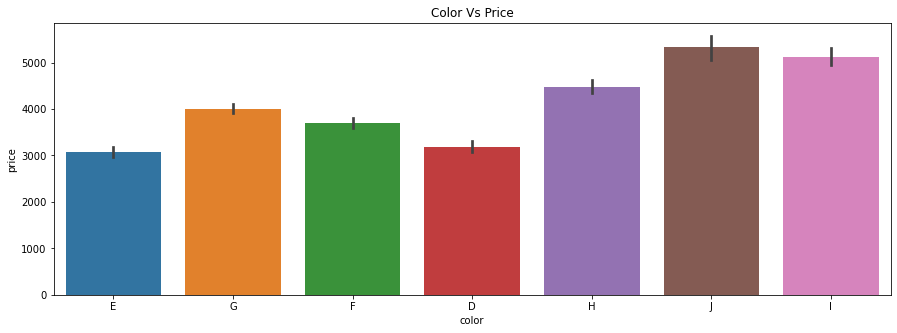

In [25]:
#Bivariate Analysis

plt.figure(figsize=(15,5))
ax = sns.barplot(x='color', y='price',data=gem_df)
plt.title("Color Vs Price")

In [26]:
# Inference
# Although "J" variety is worst color,it is sold more
# Best color "D " is best color, is sold less

Text(0.5, 1.0, 'Cut Vs Price')

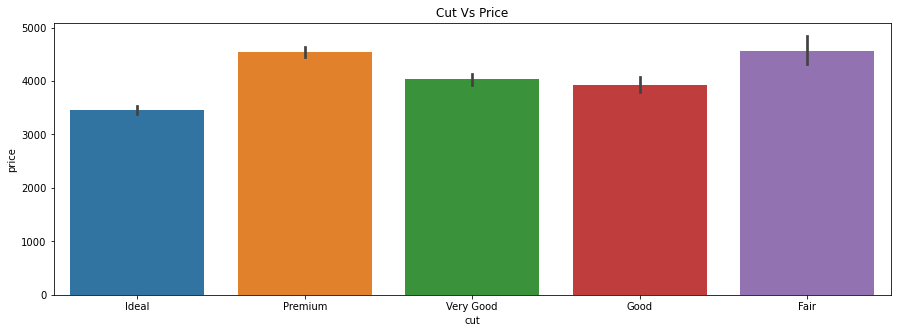

In [27]:
#Cut Vs Price
plt.figure(figsize=(15,5))
ax = sns.barplot(x='cut', y='price',data=gem_df)
plt.title("Cut Vs Price")

In [28]:
# inference
# "Premium" and " Fair" category is higly sold diamond
# # "Ideal" is high grade diamond is sold less 

Text(0.5, 1.0, 'Clarity Vs Price')

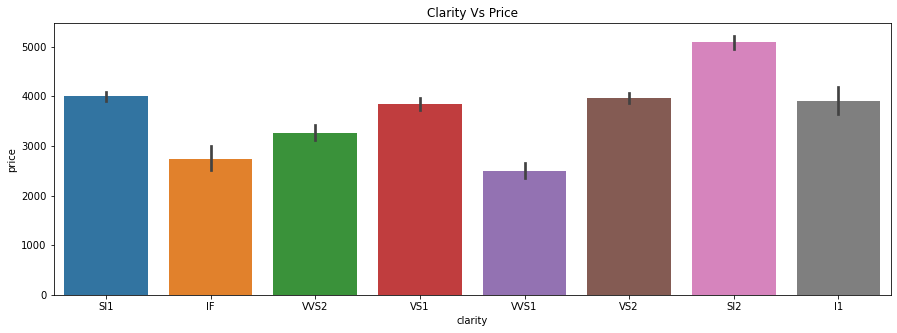

In [29]:
#clarity vs price
plt.figure(figsize=(15,5))
ax = sns.barplot(x='clarity', y='price',data=gem_df)
plt.title("Clarity Vs Price")

Text(0.5, 1.0, 'Carat Vs Price')

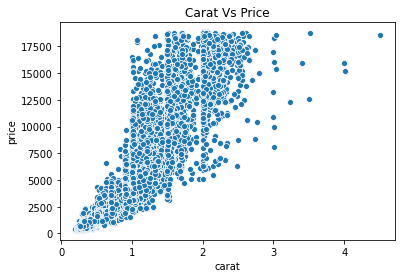

In [30]:
#ScatterPlot - Carat Vs Price
sns.scatterplot(x='carat', y='price',ci = None, data=gem_df)
plt.title("Carat Vs Price")



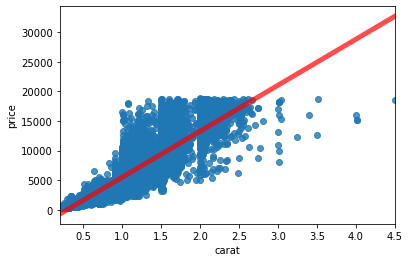

In [31]:
sns.regplot(x='carat', y='price',ci = None,line_kws={"color":"r","alpha":0.7,"lw":5}, data=gem_df)

In [32]:
# Inference
# It shows There is linear relationship between Price and carat

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?


# check for null values

In [7]:
gem_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

# Treat null values

In [8]:
mean = gem_df['depth'].mean()
gem_df["depth"] = gem_df["depth"].fillna(mean)    
        
gem_df.isnull().sum()  

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [9]:
# inference
# There are null values in depth variable ,we need to treat the null values. After treating ,null values is filled with mean of depth variables

In [10]:
#Checking for columns with values as 0
for i in gem_df.columns:
    print(gem_df[gem_df[i]==0].index.tolist())


[]
[]
[]
[]
[]
[]
[5821, 17506]
[5821, 17506]
[5821, 6034, 10827, 12498, 12689, 17506, 18194, 23758]
[]


In [11]:
# Inference
#  Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents a dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [12]:
gem_df = gem_df.replace(0, np.nan)
gem_df.dropna(inplace=True)


In [13]:
# Inference
#  Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents a dimensionless or 2-dimensional diamonds
# So we need to filter out those as it clearly faulty data points.
# we replace "0 with np.nan"

In [14]:
gem_df.describe()

,carat,depth,table,x,y,z,price
count,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000,26925.000000
mean,0.797821,61.745566,57.455305,5.729385,5.733152,3.538820,3936.249991
std,0.477085,1.393430,2.231327,1.126081,1.163820,0.717483,4020.983187
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2373.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5353.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [6]:
# There are no zeros in the dataset

In [17]:
gem_df1 = gem_df.copy()
gem_df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


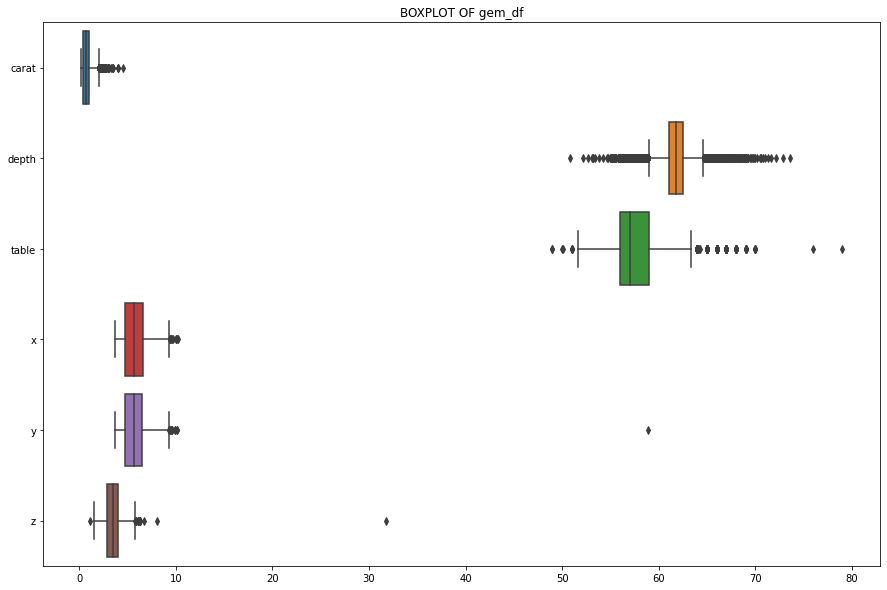

In [11]:
plt.subplots(figsize=(15,10))
plt.title('BOXPLOT OF gem_df')
sns.boxplot(data=gem_df[["carat","depth","table","x","y","z"]],orient="h")
plt.show()

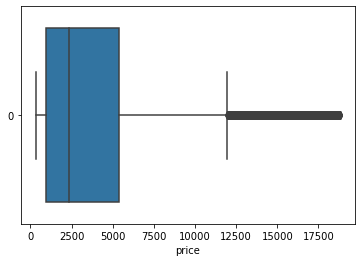

In [12]:
sns.boxplot(data = gem_df[("price")],orient = "h")
plt.xlabel("price")
plt.show()

In [7]:
# There are outliers in all the varibales

In [13]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [14]:
dtypes=gem_df.dtypes[(gem_df.dtypes!= 'object')].index
for column in gem_df[dtypes].columns:
    lr,ur=remove_outlier(gem_df[column])
    gem_df[column]=np.where(gem_df[column]>ur,ur,gem_df[column])
    gem_df[column]=np.where(gem_df[column]<lr,lr,gem_df[column])


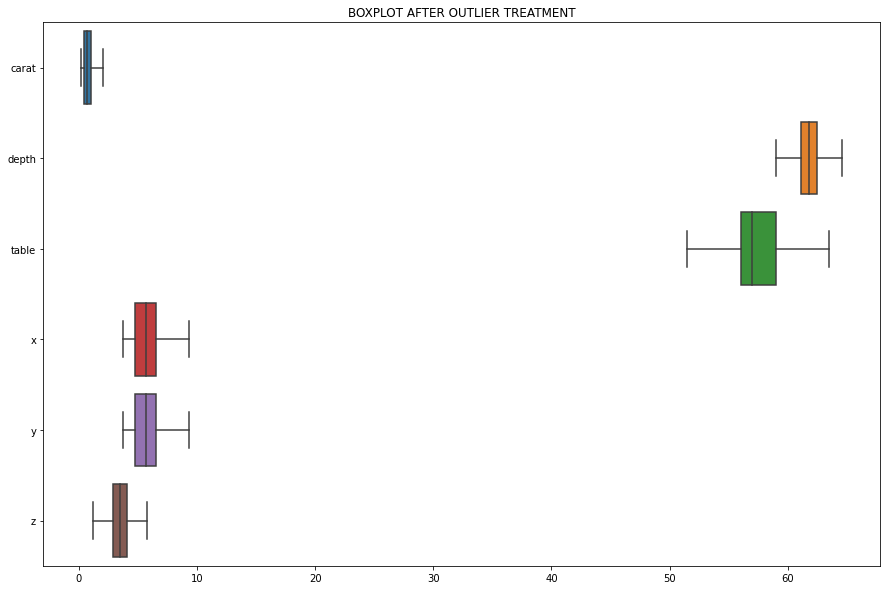

In [15]:
plt.subplots(figsize=(15,10))
plt.title('BOXPLOT AFTER OUTLIER TREATMENT')
sns.boxplot(data=gem_df[["carat","depth","table","x","y","z"]],orient="h")
plt.show()

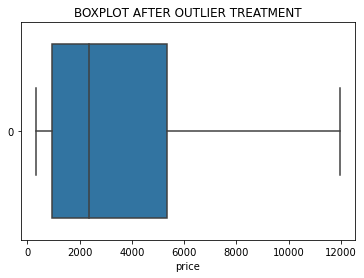

In [16]:
sns.boxplot(data = gem_df[("price")],orient = "h")
plt.title('BOXPLOT AFTER OUTLIER TREATMENT')
plt.xlabel("price")
plt.show()

In [ ]:
# after the outlier treatment, all the outliers are removed

In [ ]:
gem_df_copy = gem_df.copy()
gem_df_copy.head()

# 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.


In [17]:
gem_df['cut']=np.where(gem_df['cut'] =='Very Good', 'verygood', gem_df['cut'])

In [18]:
gem_df = pd.get_dummies(gem_df, columns=['clarity',"cut","color"],drop_first=True)

In [19]:
gem_df.head()

,carat,depth,table,x,y,z,price,clarity_IF,clarity_SI1,clarity_SI2,...,cut_Good,cut_Ideal,cut_Premium,cut_verygood,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,984.0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
# get_dummies: Convert categorical variable into dummy/indicator variables.Dummy coding is mainly used for including nominal and ordinal variables in linear regression analysis. Since such variables don't have a fixed unit of measurement, assuming a linear relation between them and an outcome variable doesn't make sense.
# Using get_dummies ,all categorical variables are converted into Dummy-coded data 
# here,Get_dummies is used,because of ordinal variables in categorical

In [20]:
gem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         26925 non-null  float64
 1   depth         26925 non-null  float64
 2   table         26925 non-null  float64
 3   x             26925 non-null  float64
 4   y             26925 non-null  float64
 5   z             26925 non-null  float64
 6   price         26925 non-null  float64
 7   clarity_IF    26925 non-null  uint8  
 8   clarity_SI1   26925 non-null  uint8  
 9   clarity_SI2   26925 non-null  uint8  
 10  clarity_VS1   26925 non-null  uint8  
 11  clarity_VS2   26925 non-null  uint8  
 12  clarity_VVS1  26925 non-null  uint8  
 13  clarity_VVS2  26925 non-null  uint8  
 14  cut_Good      26925 non-null  uint8  
 15  cut_Ideal     26925 non-null  uint8  
 16  cut_Premium   26925 non-null  uint8  
 17  cut_verygood  26925 non-null  uint8  
 18  color_E       26925 non-nu

In [38]:
# After conversion,All variables are now numerical variables 

In [22]:
#DataFrame Scaling
from scipy.stats import zscore
gem_df_scaled = gem_df.apply(zscore)
gem_df_scaled.head(10)


,carat,depth,table,x,y,z,price,clarity_IF,clarity_SI1,clarity_SI2,...,cut_Good,cut_Ideal,cut_Premium,cut_verygood,color_E,color_F,color_G,color_H,color_I,color_J
0,-1.067382,0.287935,0.261968,-1.296530,-1.289659,-1.261558,-0.933395,-0.184999,1.761227,-0.451601,...,-0.315251,1.221434,-0.585856,-0.537030,2.115896,-0.461166,-0.515335,-0.423276,-0.338298,-0.237705
1,-1.002446,-0.779219,0.261968,-1.163253,-1.137530,-1.204060,-0.793477,5.405447,-0.567786,-0.451601,...,-0.315251,-0.818710,1.706903,-0.537030,-0.472613,-0.461166,1.940486,-0.423276,-0.338298,-0.237705
2,0.231349,0.370024,1.189326,0.276134,0.347964,0.348406,0.736960,-0.184999,-0.567786,-0.451601,...,-0.315251,-0.818710,-0.585856,1.862095,2.115896,-0.461166,-0.515335,-0.423276,-0.338298,-0.237705
3,-0.807636,-0.122509,-0.665390,-0.807849,-0.833272,-0.830318,-0.765205,-0.184999,-0.567786,-0.451601,...,-0.315251,1.221434,-0.585856,-0.537030,-0.472613,2.168417,-0.515335,-0.423276,-0.338298,-0.237705
4,-1.045737,-1.107574,0.725647,-1.225449,-1.164377,-1.275933,-0.852618,-0.184999,-0.567786,-0.451601,...,-0.315251,1.221434,-0.585856,-0.537030,-0.472613,2.168417,-0.515335,-0.423276,-0.338298,-0.237705
5,0.491095,-0.204597,-0.665390,0.649309,0.679069,0.650274,1.663877,-0.184999,-0.567786,-0.451601,...,-0.315251,1.221434,-0.585856,-0.537030,-0.472613,-0.461166,-0.515335,-0.423276,-0.338298,-0.237705
6,0.469450,1.601356,1.189326,0.551573,0.509042,0.707773,0.317784,-0.184999,1.761227,-0.451601,...,3.172072,-0.818710,-0.585856,-0.537030,-0.472613,-0.461166,-0.515335,2.362524,-0.338298,-0.237705
7,-0.634472,-0.204597,2.116685,-0.567951,-0.600604,-0.600323,-0.669138,-0.184999,1.761227,-0.451601,...,-0.315251,-0.818710,1.706903,-0.537030,2.115896,-0.461166,-0.515335,-0.423276,-0.338298,-0.237705
8,0.902360,1.683445,2.812204,0.880322,0.804351,1.038391,0.482512,-0.184999,1.761227,-0.451601,...,3.172072,-0.818710,-0.585856,-0.537030,-0.472613,-0.461166,-0.515335,2.362524,-0.338298,-0.237705
9,-0.959155,-1.025485,-0.201711,-1.074402,-1.012248,-1.117812,-0.873677,-0.184999,-0.567786,-0.451601,...,-0.315251,1.221434,-0.585856,-0.537030,-0.472613,2.168417,-0.515335,-0.423276,-0.338298,-0.237705


In [40]:
# Z-score is a variation of scaling that represents the number of standard deviations away from the mean.
# z-score to ensure your feature distributions have mean = 0 and std = 1.
# Scaling done to whole dataset using zscore scaler because carat,depth ,table and price has different scales .x,y,z variables have single digit unit
#This will affect the model.Scaling will make dataset are notbiases and all data are at same level.so,It is important to scale the data 


# Train-Test Split

In [23]:
X = gem_df_scaled.drop('price', axis=1)

y = gem_df_scaled[['price']]

In [41]:
#Separating independent (train) and dependent (test)variables for the linear regrssion model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [25]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)


The training set for the independent variables: (18847, 23)
The training set for the dependent variable: (18847, 1)
The test set for the independent variables: (8078, 23)
The test set for the dependent variable: (8078, 1)


In [1]:
#spilting the dataset into train and test set to build Linear regression model (70:30)
# X_train :70% of data randomly chosen from the 23 columns .These are training independent variables
# X_test :30% of data randomly chosen from the 23 columns .These are test independent variables
# y_train :70% of data randomly chosen from the "price" column .These are training dependent variables
# y_test :30% of data randomly chosen from the "price" columns.These are test ndependent variables


# Using Linear Model from Sklearn library


In [ ]:
# Model building:Linear Regression
#Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).
# Here,two types library is used 
#1.Sklearn learn 
#2.statsmodels

In [26]:
from sklearn import metrics

# Fit the model to the training set

In [27]:


regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [2]:

#We now fit our model to the linear regression model by training the model with our independent variable and dependent variables.

# Get the score on training set

In [28]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.2262124015885945
The coefficient for depth is 0.004353241032529015
The coefficient for table is -0.014362465653953445
The coefficient for x is -0.382284181088136
The coefficient for y is 0.3489222184258426
The coefficient for z is -0.12853588593174087
The coefficient for clarity_IF is 0.20616926599894056
The coefficient for clarity_SI1 is 0.31411709427489776
The coefficient for clarity_SI2 is 0.185279232333912
The coefficient for clarity_VS1 is 0.3472721324455984
The coefficient for clarity_VS2 is 0.3708294790623183
The coefficient for clarity_VVS1 is 0.27486279036869943
The coefficient for clarity_VVS2 is 0.3170706673107511
The coefficient for cut_Good is 0.03203937066436818
The coefficient for cut_Ideal is 0.08906993313935459
The coefficient for cut_Premium is 0.07532878397570261
The coefficient for cut_verygood is 0.060411638656746244
The coefficient for color_E is -0.02105022143782283
The coefficient for color_F is -0.02536843505101097
The coefficient

In [ ]:
#The coefficients for each of the independent attributes
# The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
# The coefficient for carat is 1.22 which shows "carat" variable is high positive correlation with "price" (dependent variables)
# If Carat of diamond increases ,the price of diamond increases
# There is more negative correlation between "price " and x,z variables .so, x(length) and z(height) increases ,price of diamond decreases


# score on training set

In [29]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.9404719027464119


# Get the score on test set

In [30]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.9416169664411842


In [3]:
#The most common interpretation of r-squared is how well the regression model fits the observed data. 
#Accuracy of both training and test dataset is 94% and it shows that there is no overfitting of the data
#r-squared of 94% reveals that 94% of the data fit the regression model. Generally, a higher r-squared indicates a better fit for the model.

# Get the RMSE on test set

In [31]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 0.2429336089664584


In [32]:
#RMSE on Training data

predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.24341465472368032

In [ ]:
# The RMSE is the square root of the variance of the residuals.
#As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. 
#Lower values of RMSE indicate better fit. 
# here ,The Root Mean Square Error (RMSE) of the model is for training and testing set is 24%
#RMSE value ≥0.5 reflects the poor ability of the model to accurately predict the data. Since both the Training and Testing data both have RMSE value lesser than 0.5 we can clearly see that the model built is good to go.

# Check Multi-collinearity using VIF

In [33]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [34]:
i=0
for column in X.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 33.36253335577607
depth ---> 4.56787352371706
table ---> 1.8068714798640795
x ---> 467.49864261811786
y ---> 474.49691271700016
z ---> 240.90385842104675
clarity_IF ---> 3.5704318660243244
clarity_SI1 ---> 15.004036090719572
clarity_SI2 ---> 11.56856412272262
clarity_VS1 ---> 10.913390573779143
clarity_VS2 ---> 14.39844247861095
clarity_VVS1 ---> 6.054298242493809
clarity_VVS2 ---> 7.6653943644166835
cut_Good ---> 4.097082396915314
cut_Ideal ---> 11.357092991336216


In [4]:
# A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. 
#The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.
#table,clarity_IF  ,cut_Good ,depth are moderately correlated 
#others have huge VIF values values which shows that there is a heavy influence on multicollinearity which needs to be treated.

In [35]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.00014727582310088724


In [ ]:
#The intercept (often labeled as constant) is the point where the function crosses the y-axis. 
#The negative intercept shows where the linear model predicts price (y) would be when subs (x) is 0.

In [36]:
y_pred = regression_model.predict(X_test)

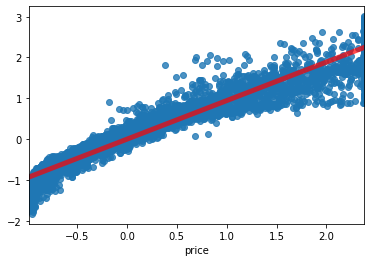

In [37]:

sns.regplot(y_test['price'], y_pred,ci = None,line_kws={"color":"r","alpha":0.7,"lw":5},data = gem_df) 

In [ ]:
# Since this is regression model, plot between predicted y value vs actual y values of the test data
# A good model prediction will be close to actual leading to high R and R2 values
# The above scatter plot is based on the scaled data and so range for both the Predicted and the actual Prices is between -2 to +2. T
#he X- axis is the "Actual" Price of the test data and the Y axis is the "Predicted" values of the test data. 
#Because of the huge volumes of test data the scatter plot seem to be to crowded which we can be corrected by decreasing the test data amount considerably

# Linear Regression using statsmodels

In [ ]:
#

In [38]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,...,cut_Ideal,cut_Premium,cut_verygood,color_E,color_F,color_G,color_H,color_I,color_J,price
5030,0.664259,1.273001,-0.665390,0.711505,0.759608,0.880269,-0.184999,-0.567786,2.214342,-0.422971,...,-0.81871,-0.585856,-0.537030,2.115896,-0.461166,-0.515335,-0.423276,-0.338298,-0.237705,0.095359
12108,0.469450,1.847622,-0.665390,0.507147,0.580632,0.750897,-0.184999,-0.567786,2.214342,-0.422971,...,-0.81871,-0.585856,1.862095,-0.472613,-0.461166,-0.515335,-0.423276,-0.338298,-0.237705,0.412986
20181,-0.266498,-0.861308,1.838477,-0.114810,-0.081576,-0.183457,-0.184999,-0.567786,-0.451601,-0.422971,...,-0.81871,-0.585856,-0.537030,-0.472613,-0.461166,-0.515335,-0.423276,2.955976,-0.237705,-0.584611
4712,-0.071688,-2.256817,2.580364,0.285019,0.213733,-0.097209,-0.184999,1.761227,-0.451601,-0.422971,...,-0.81871,-0.585856,-0.537030,-0.472613,-0.461166,1.940486,-0.423276,-0.338298,-0.237705,-0.371417
2548,0.469450,0.862557,0.725647,0.569343,0.544837,0.650274,-0.184999,-0.567786,-0.451601,2.364228,...,-0.81871,1.706903,-0.537030,-0.472613,-0.461166,1.940486,-0.423276,-0.338298,-0.237705,0.831873


In [39]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_verygood',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'price'],
      dtype='object')

In [44]:
expr= 'price ~ clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2 + cut_Good + cut_Ideal + cut_Premium + cut_verygood + color_E+color_F + color_G + color_H + color_I + color_J + carat+ depth + table + x + y + z'
expr

'price ~ clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2 + cut_Good + cut_Ideal + cut_Premium + cut_verygood + color_E+color_F + color_G + color_H + color_I + color_J + carat+ depth + table + x + y + z'

In [45]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()# OLS : ORDINARY LEAST SQ 
lm1.params

Intercept      -0.000147
clarity_IF      0.206169
clarity_SI1     0.314117
clarity_SI2     0.185279
clarity_VS1     0.347272
clarity_VS2     0.370829
clarity_VVS1    0.274863
clarity_VVS2    0.317071
cut_Good        0.032039
cut_Ideal       0.089070
cut_Premium     0.075329
cut_verygood    0.060412
color_E        -0.021050
color_F        -0.025368
color_G        -0.048290
color_H        -0.086110
color_I        -0.116483
color_J        -0.120833
carat           1.226212
depth           0.004353
table          -0.014362
x              -0.382284
y               0.348922
z              -0.128536
dtype: float64

In [46]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.293e+04
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:46:54   Log-Likelihood:                -112.13
No. Observations:               18847   AIC:                             272.3
Df Residuals:                   18823   BIC:                             460.5
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0001      0.002     -0.083   

In [ ]:
#Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
# Adj. R-squared:                  0.940 indicates good fit
#coefficient represents the change in the output Y due to a change of one unit in the unemployment rate (everything else held constant)
#carat is highly correlated with y(price)
#std err reflects the level of accuracy of the coefficients.Most of variables has lower levels. The lower it is, the higher is the level of accuracy
#P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
# expect depth ,all other variables have p-value of less than 0.05 is considered to be statistically significant
# Confidence Interval for dataset is ( [0.025      0.975]) which represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

#const coefficient is your Y-intercept. It means that if both the Interest_Rate and Unemployment_Rate coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
#Interest_Rate coefficient represents the change in the output Y due to a change of one unit in the interest rate (everything else held constant)

In [47]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
mse

0.05925069413424852

In [48]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.24341465472368035

In [49]:
# Prediction on Test data
y_pred = lm1.predict(data_test)
y_pred

11971    1.335427
3294     0.439411
25427    2.734394
709      2.370025
8010     1.536552
           ...   
17455    0.196332
26170    0.176966
22115   -1.149840
2275    -0.925088
25166    0.384090
Length: 8078, dtype: float64

In [50]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (0.21) * clarity_IF + (0.31) * clarity_SI1 + (0.19) * clarity_SI2 + (0.35) * clarity_VS1 + (0.37) * clarity_VS2 + (0.27) * clarity_VVS1 + (0.32) * clarity_VVS2 + (0.03) * cut_Good + (0.09) * cut_Ideal + (0.08) * cut_Premium + (0.06) * cut_verygood + (-0.02) * color_E + (-0.03) * color_F + (-0.05) * color_G + (-0.09) * color_H + (-0.12) * color_I + (-0.12) * color_J + (1.23) * carat + (0.0) * depth + (-0.01) * table + (-0.38) * x + (0.35) * y + (-0.13) * z + 

In [ ]:
#the best attributes of linear equation that is produced by the model for the target variable “Price”.
#From the above results we can say that the five most important attributes based on order are:
#1. Carat
#2. Y
#3. Clarity
#4. Z

In [57]:
expr1= 'price ~ clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2 + cut_Good + cut_Ideal + cut_Premium + cut_verygood + color_E+color_F + color_G + color_H + color_I + color_J + carat+ table + x + y + z'
expr1

'price ~ clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2 + cut_Good + cut_Ideal + cut_Premium + cut_verygood + color_E+color_F + color_G + color_H + color_I + color_J + carat+ table + x + y + z'

In [59]:
lm2 = smf.ols(formula= expr1, data = data_train).fit()# OLS : ORDINARY LEAST SQ 
lm2.params

Intercept      -0.000134
clarity_IF      0.206186
clarity_SI1     0.314415
clarity_SI2     0.185483
clarity_VS1     0.347412
clarity_VS2     0.371054
clarity_VVS1    0.274940
clarity_VVS2    0.317189
cut_Good        0.032349
cut_Ideal       0.088552
cut_Premium     0.074859
cut_verygood    0.060283
color_E        -0.021054
color_F        -0.025340
color_G        -0.048240
color_H        -0.086060
color_I        -0.116402
color_J        -0.120803
carat           1.227296
table          -0.014927
x              -0.391184
y               0.331633
z              -0.103267
dtype: float64

In [60]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.352e+04
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        11:52:16   Log-Likelihood:                -112.83
No. Observations:               18847   AIC:                             271.7
Df Residuals:                   18824   BIC:                             452.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0001      0.002     -0.076   

In [61]:
# Calculate MSE
mse1 = np.mean((lm2.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
mse1

0.05925510470401256

In [ ]:
#Residuals check:

In [62]:
y_pred1 = lm2.predict(data_test)
y_pred1

11971    1.334660
3294     0.440258
25427    2.735538
709      2.369388
8010     1.536468
           ...   
17455    0.198454
26170    0.175127
22115   -1.150356
2275    -0.923435
25166    0.382826
Length: 8078, dtype: float64

In [ ]:
# A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line. If the regression line actually passes through the point, the residual at that point is zero.

In [63]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (0.21) * clarity_IF + (0.31) * clarity_SI1 + (0.19) * clarity_SI2 + (0.35) * clarity_VS1 + (0.37) * clarity_VS2 + (0.27) * clarity_VVS1 + (0.32) * clarity_VVS2 + (0.03) * cut_Good + (0.09) * cut_Ideal + (0.07) * cut_Premium + (0.06) * cut_verygood + (-0.02) * color_E + (-0.03) * color_F + (-0.05) * color_G + (-0.09) * color_H + (-0.12) * color_I + (-0.12) * color_J + (1.23) * carat + (-0.01) * table + (-0.39) * x + (0.33) * y + (-0.1) * z + 

In [ ]:
# Based on the best attributes we can decide the price of the diamond
# If the carat of the diamond increases price also increases .same goes with y(width ) and clarity of the diamond ,If we increase them price of the diamond automatically increases
# x (length) of the diamond increases ,price of the diamond will decrease

In [ ]:
#model without scaling

In [51]:
# Copy all the predictor variables into X dataframe
X_copy = gem_df_copy.drop('price', axis=1)

# Copy target into the y dataframe. 
y_copy = gem_df_copy[['price']]


In [52]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X_copy, y_copy, test_size=0.30 , random_state=1)


In [53]:
reg = LinearRegression()
reg.fit(X_train_copy, y_train_copy)


LinearRegression()

In [54]:
y_pred = reg.predict(X_test_copy)
np.set_printoptions(precision=5) #2 decimal places
prediction = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test_copy.values.reshape(len(y_test_copy),1)),1),columns=['Predicted','Actual'])
prediction

,Predicted,Actual
0,8363.484916,8758.0
1,5257.597881,4718.0
2,13212.767224,11965.0
3,11949.744949,11965.0
4,9060.652050,8165.0
...,...,...
8073,4415.004222,4642.0
8074,4347.877913,4038.0
8075,-251.269955,613.0
8076,527.792085,844.0


In [55]:
y_pred = regression_model.predict(X_test)
np.set_printoptions(precision=5) #2 decimal places
prediction = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1),columns=['Predicted','Actual'])
prediction


,Predicted,Actual
0,1.335427,1.449240
1,0.439411,0.283743
2,2.734394,2.374426
3,2.370025,2.374426
4,1.536552,1.278166
...,...,...
8073,0.196332,0.261818
8074,0.176966,0.087570
8075,-1.149840,-0.900507
8076,-0.925088,-0.833866


# model with outliers

In [18]:
gem_df1['cut']=np.where(gem_df1['cut'] =='Very Good', 'verygood', gem_df1['cut'])

In [19]:
gem_df1 = pd.get_dummies(gem_df1, columns=['clarity',"cut","color"],drop_first=True)

In [20]:
from scipy.stats import zscore
gem_df_scaled1 = gem_df1.apply(zscore)
gem_df_scaled1.head(10)


,carat,depth,table,x,y,z,price,clarity_IF,clarity_SI1,clarity_SI2,...,cut_Good,cut_Ideal,cut_Premium,cut_verygood,color_E,color_F,color_G,color_H,color_I,color_J
0,-1.043484,0.254366,0.244117,-1.296010,-1.240036,-1.224888,-0.854844,-0.184999,1.761227,-0.451601,...,-0.315251,1.221434,-0.585856,-0.537030,2.115896,-0.461166,-0.515335,-0.423276,-0.338298,-0.237705
1,-0.980601,-0.678601,0.244117,-1.162802,-1.093962,-1.169137,-0.734225,5.405447,-0.567786,-0.451601,...,-0.315251,-0.818710,1.706903,-0.537030,-0.472613,-0.461166,1.940486,-0.423276,-0.338298,-0.237705
2,0.214178,0.326132,1.140461,0.275843,0.332401,0.336153,0.585129,-0.184999,-0.567786,-0.451601,...,-0.315251,-0.818710,-0.585856,1.862095,2.115896,-0.461166,-0.515335,-0.423276,-0.338298,-0.237705
3,-0.791951,-0.104468,-0.652227,-0.807581,-0.801816,-0.806752,-0.709852,-0.184999,-0.567786,-0.451601,...,-0.315251,1.221434,-0.585856,-0.537030,-0.472613,2.168417,-0.515335,-0.423276,-0.338298,-0.237705
4,-1.022523,-0.965668,0.692289,-1.224966,-1.119740,-1.238826,-0.785208,-0.184999,-0.567786,-0.451601,...,-0.315251,1.221434,-0.585856,-0.537030,-0.472613,2.168417,-0.515335,-0.423276,-0.338298,-0.237705
5,0.465710,-0.176235,-0.652227,0.648825,0.650325,0.628848,1.384202,-0.184999,-0.567786,-0.451601,...,-0.315251,1.221434,-0.585856,-0.537030,-0.472613,-0.461166,-0.515335,-0.423276,-0.338298,-0.237705
6,0.444749,1.402633,1.140461,0.551139,0.487067,0.684600,0.223768,-0.184999,1.761227,-0.451601,...,3.172072,-0.818710,-0.585856,-0.537030,-0.472613,-0.461166,-0.515335,2.362524,-0.338298,-0.237705
7,-0.624263,-0.176235,2.036805,-0.567807,-0.578409,-0.583746,-0.627035,-0.184999,1.761227,-0.451601,...,-0.315251,-0.818710,1.706903,-0.537030,2.115896,-0.461166,-0.515335,-0.423276,-0.338298,-0.237705
8,0.863969,1.474399,2.933149,0.879718,0.770621,1.005170,0.365776,-0.184999,1.761227,-0.451601,...,3.172072,-0.818710,-0.585856,-0.537030,-0.472613,-0.461166,-0.515335,2.362524,-0.338298,-0.237705
9,-0.938678,-0.893902,-0.204055,-1.073997,-0.973667,-1.085510,-0.803363,-0.184999,-0.567786,-0.451601,...,-0.315251,1.221434,-0.585856,-0.537030,-0.472613,2.168417,-0.515335,-0.423276,-0.338298,-0.237705


In [21]:
X1 = gem_df_scaled1.drop('price', axis=1)

y1 = gem_df_scaled1[['price']]

In [23]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30 , random_state=1)

In [24]:
regression_model1 = LinearRegression()
regression_model1.fit(X_train1, y_train1)

LinearRegression()

In [25]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train1.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model1.coef_[0][idx]))

The coefficient for carat is 1.3746694668955433
The coefficient for depth is -0.02636723313598971
The coefficient for table is -0.01825694843820312
The coefficient for x is -0.3152628158998547
The coefficient for y is -0.0017781240099550566
The coefficient for z is -0.008205664089262599
The coefficient for clarity_IF is 0.23125303656858287
The coefficient for clarity_SI1 is 0.3799625221456358
The coefficient for clarity_SI2 is 0.2407721536300774
The coefficient for clarity_VS1 is 0.3995346677144969
The coefficient for clarity_VS2 is 0.434451360727832
The coefficient for clarity_VVS1 is 0.30753946079122746
The coefficient for clarity_VVS2 is 0.3533065062431744
The coefficient for cut_Good is 0.030867689990855415
The coefficient for cut_Ideal is 0.08270439042531506
The coefficient for cut_Premium is 0.06365723645386902
The coefficient for cut_verygood is 0.05804355640699298
The coefficient for color_E is -0.01889877686296913
The coefficient for color_F is -0.024890930726022893
The coeffi

In [26]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model1.score(X_train1, y_train1))

The coefficient of determination R^2 of the prediction on Train set 0.9201885054128012


In [27]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS
print('The coefficient of determination R^2 of the prediction on Test set',regression_model1.score(X_test1, y_test1))

The coefficient of determination R^2 of the prediction on Test set 0.9241303724615555


In [28]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test1,regression_model1.predict(X_test1))))

The Root Mean Square Error (RMSE) of the model is for testing set is 0.2774826086372049


In [31]:
#RMSE on Training data
from sklearn import metrics
predicted_train1=regression_model1.fit(X_train1, y_train1).predict(X_train1)
np.sqrt(metrics.mean_squared_error(y_train1,predicted_train1))

0.2816069506294545

In [32]:
vif1 = [variance_inflation_factor(X1.values, ix) for ix in range(X1.shape[1])] 

In [34]:
i=0
for column in X1.columns:
    if i < 15:
        print (column ,"--->",  vif1[i])
        i = i+1

carat ---> 25.562628750525974
depth ---> 1.6538031252836036
table ---> 1.7966311725070756
x ---> 48.74664688262607
y ---> 13.909593527885571
z ---> 16.09355096098092
clarity_IF ---> 3.5561684412412915
clarity_SI1 ---> 15.00607620566902
clarity_SI2 ---> 11.56371082561483
clarity_VS1 ---> 10.909007239931558
clarity_VS2 ---> 14.387847811060004
clarity_VVS1 ---> 6.031191451375606
clarity_VVS2 ---> 7.641458875366355
cut_Good ---> 3.988980286723542
cut_Ideal ---> 11.597822801368144


In [35]:
# Let us check the intercept for the model

intercept1 = regression_model1.intercept_[0]

print("The intercept for our model is {}".format(intercept1))

The intercept for our model is -2.697860710829331e-05


In [36]:
y_pred1 = regression_model1.predict(X_test1)

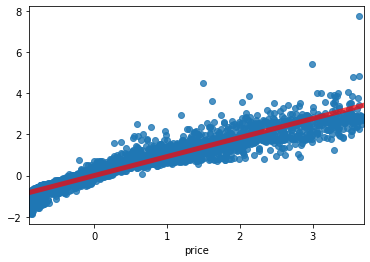

In [37]:
sns.regplot(y_test1['price'], y_pred1,ci = None,line_kws={"color":"r","alpha":0.7,"lw":5},data = gem_df1) 

# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

# Problem 2: Logistic Regression and LDA

### You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.
### Dataset for Problem 2: Holiday_Package.csv

# Data Dictionary:
### Variable Name:	Description
### Holiday_Package: 	 Opted for Holiday Package yes/no?
### Salary: 	 Employee salary
### age: 	 Age in years
### edu: 	 Years of formal education
### no_young_children :	 The number of young children (younger than 7 years)
### no_older_children :	 Number of older children
### foreign ""	 foreigner Yes/No



# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.


In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
holi_df = pd.read_csv("Holiday_Package.csv")
holi_df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
# Inference
# The column “Unnamed : 0” is removed from the dataset before proceeding further as its insignificant for the analysis.


In [5]:
holi_df = holi_df.drop("Unnamed: 0",axis = 1)
holi_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [6]:
holi_df.shape

(872, 7)

In [7]:
holi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [8]:
# There are 872 rows and 7 columns
# There are no null values 
# There are 5 integer and 2 object variables

In [9]:
holi_df.describe(include = "all")

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [10]:
#Holliday_Package
#There are 2 unique values 
#employees of a company who not opted(no) is 471
#foreign
#There are 2 unique values 
# 656 foreign employees said no to Holiday_package
# highest salary paid:236961
#lowest paid salary:1322
# Minimum age of the empl0yee :20
#Maximum age of the employee: 62
#Average Years of formal education:9.3 years


In [11]:
holi_df.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [12]:
#There are no null values

In [13]:
# Check for duplicate data

In [14]:
dups = holi_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


In [15]:
#There are no null values

# Geting unique counts of all Objects

In [16]:
holi_df.foreign.value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [17]:
#foreign employers:216
#non-foreign employers:656

In [18]:
holi_df.Holliday_Package.value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [19]:
holi_df.Holliday_Package.value_counts(normalize = True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

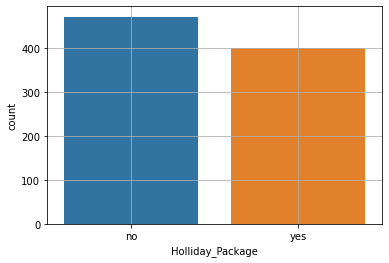

In [20]:
sns.countplot(holi_df.Holliday_Package)

plt.grid()

plt.show()

In [21]:

#employees who opted for Holiday Package:401(45.9%)
#employees who not opted for Holiday Package:471(54%)


Text(0.5, 1.0, 'no_older_children vs Holliday_Package')

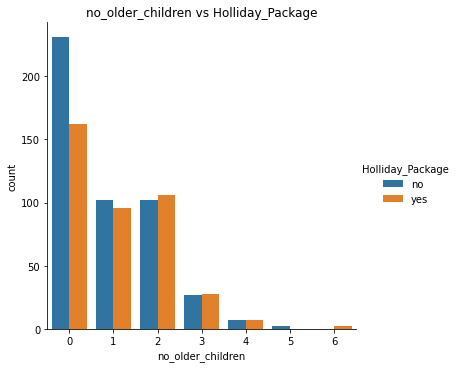

In [22]:
sns.catplot(x="no_older_children", kind="count",hue='Holliday_Package', data=holi_df)
plt.title("no_older_children vs Holliday_Package")

In [23]:
#some Employees with no kids opted for Holiday_package but most of employees with no kids not opted the Holiday package

Text(0.5, 1.0, 'no_young_children vs Holliday_Package')

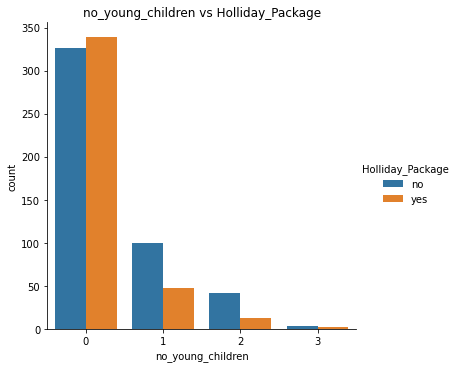

In [24]:
sns.catplot(x="no_young_children", kind="count",hue='Holliday_Package', data=holi_df)
plt.title("no_young_children vs Holliday_Package")

Text(0.5, 1.0, 'foreign & Salary')

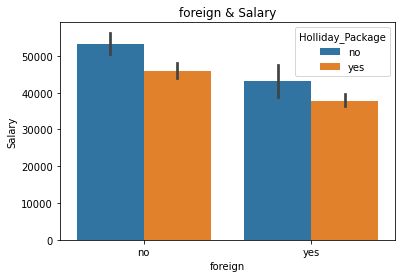

In [25]:
#plt.figure(figsize=(15,5))
ax = sns.barplot(x='foreign', y='Salary', hue='Holliday_Package',data=holi_df)
plt.title("foreign & Salary")

In [26]:
##some foreign employers paid less salary than the other employees


C:\Users\sugan\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'foreign vs Holliday_Package')

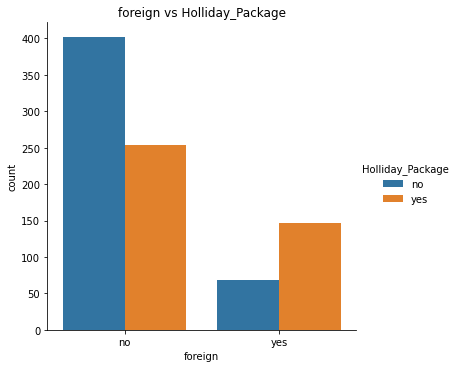

In [27]:
#plt.figure(figsize=(15,7))
ax = sns.catplot(x='foreign', kind='count',data=holi_df,hue='Holliday_Package',ax=ax)
plt.title("foreign vs Holliday_Package")

In [28]:
#most of foreign employees are not opted for holiday package

C:\Users\sugan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


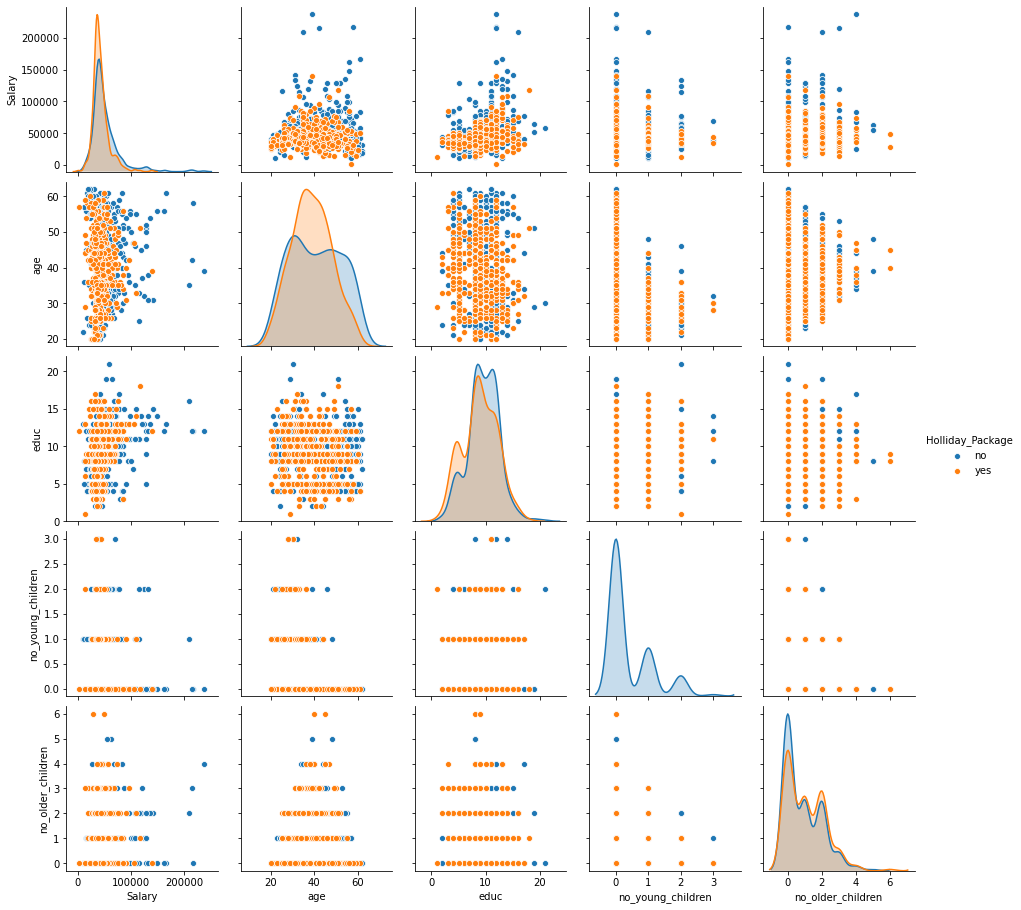

In [29]:
sns.pairplot(holi_df , hue='Holliday_Package' , diag_kind = 'kde')

In [30]:

# Some of the attributes look like they may have an exponential distribution
# Salary should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.
#age and salary are correlated with each each other
#educ and salary are correlated with each each other
# There is no obvious relationship between no younger children and holiday package


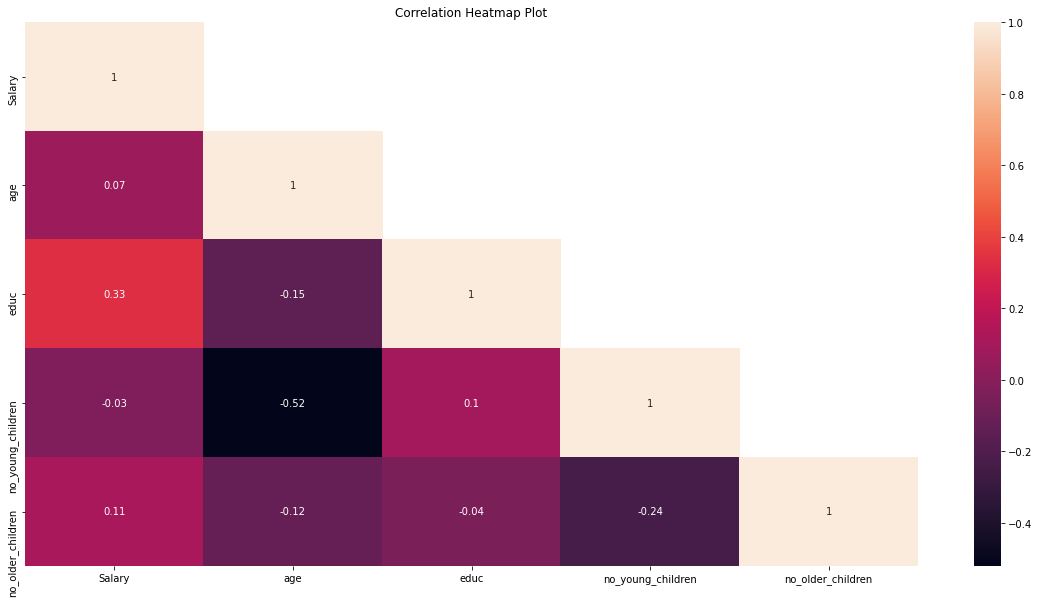

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(round(holi_df.corr(),2), annot=True,mask=np.triu(holi_df.corr(),+1));
plt.title('Correlation Heatmap Plot')
plt.show()

In [32]:
# positive correlation between educ and salary
#moderate negative correlation seen between age and no_young_children

In [33]:
holi_df.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

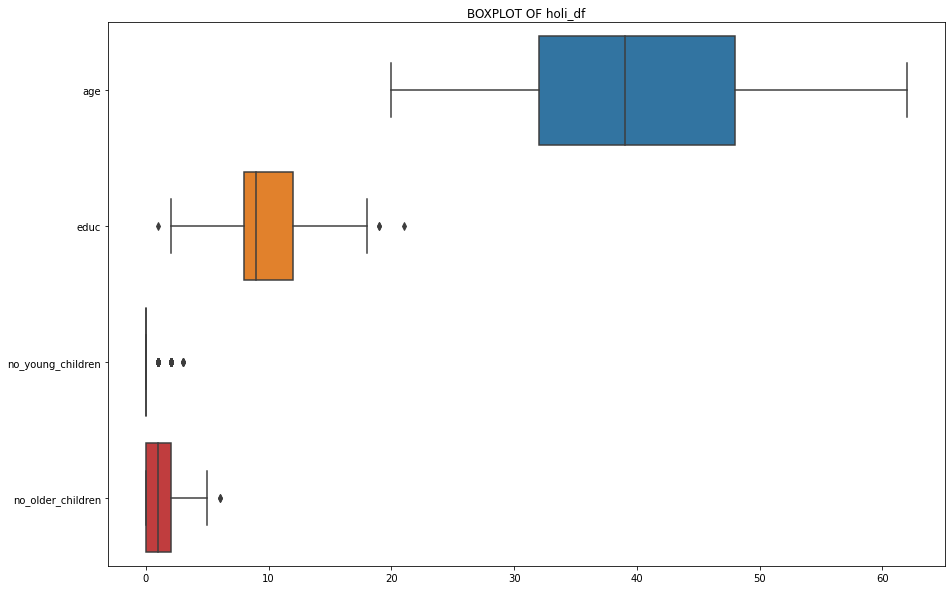

In [34]:
plt.subplots(figsize=(15,10))
plt.title('BOXPLOT OF holi_df')
sns.boxplot(data=holi_df[['Holliday_Package', 'age', 'educ', 'no_young_children','no_older_children', 'foreign']],orient="h")
plt.show()

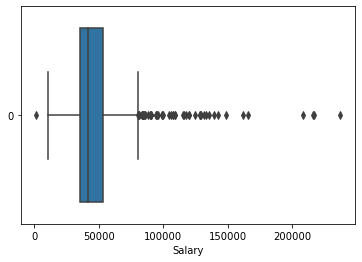

In [35]:
sns.boxplot(data = holi_df[("Salary")],orient = "h")
plt.xlabel("Salary")
plt.show()

In [36]:
#except age ,all other variables have Outliers 

In [37]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [38]:
dtypes=holi_df.dtypes[(holi_df.dtypes!= 'object')].index
for column in holi_df[dtypes].columns:
    lr,ur=remove_outlier(holi_df[column])
    holi_df[column]=np.where(holi_df[column]>ur,ur,holi_df[column])
    holi_df[column]=np.where(holi_df[column]<lr,lr,holi_df[column])


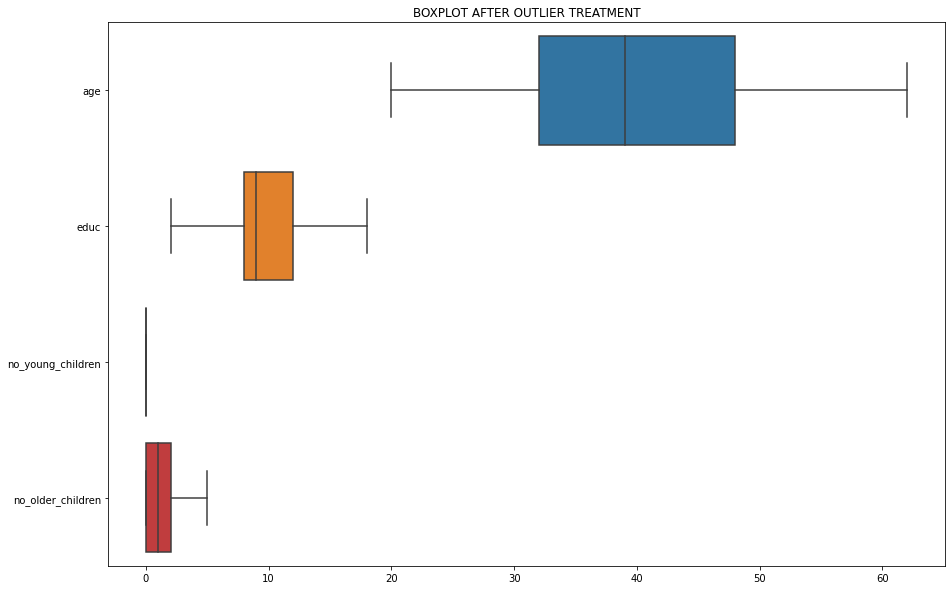

In [39]:
plt.subplots(figsize=(15,10))
plt.title('BOXPLOT AFTER OUTLIER TREATMENT')
sns.boxplot(data=holi_df[['Holliday_Package', 'age', 'educ', 'no_young_children','no_older_children', 'foreign']],orient="h")
plt.show()

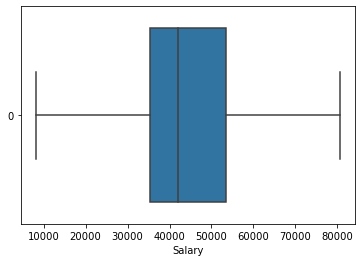

In [40]:
sns.boxplot(data = holi_df[("Salary")],orient = "h")
plt.xlabel("Salary")
plt.show()

In [41]:
#After outlier tratment ,all outliers are removed

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).


In [42]:
for feature in holi_df.columns: 
    if holi_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(holi_df[feature].unique()))
        print(pd.Categorical(holi_df[feature].unique()).codes)
        holi_df[feature] = pd.Categorical(holi_df[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [43]:
#Codes are an array of integers which are the positions of the actual values in the categories array.
# here Holliday_Package and foreign are categorical variables are now converted into integers using codes

In [44]:
holi_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30.0,8.0,0.0,1.0,0
1,1,37207.0,45.0,8.0,0.0,1.0,0
2,0,58022.0,46.0,9.0,0.0,0.0,0
3,0,66503.0,31.0,11.0,0.0,0.0,0
4,0,66734.0,44.0,12.0,0.0,2.0,0


In [45]:
holi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    int8   
dtypes: float64(5), int8(2)
memory usage: 35.9 KB


# Train-Test Split

In [46]:
X = holi_df.drop("Holliday_Package",axis = 1)
y = holi_df[["Holliday_Package"]]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [48]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)

The training set for the independent variables: (610, 6)
The training set for the dependent variable: (610, 1)
The test set for the independent variables: (262, 6)
The test set for the dependent variable: (262, 1)


In [49]:
#spilting the dataset into train and test set to build Logistic regression and LDA model (70:30)
# X_train :70% of data randomly chosen from the 6 columns .These are training independent variables
# X_test :30% of data randomly chosen from the 6 columns .These are test independent variables
# y_train :70% of data randomly chosen from the "Holliday_Package" column .These are training dependent variables
# y_test :30% of data randomly chosen from the "Holliday_Package" columns.These are test ndependent variables


# Logistic Regression Model

In [50]:

#Logistic regression is a fundamental classification technique.It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression.
#It is the go-to method for binary classification problems (problems with two class values).
# two library is used
#1.sklearn
#2.statsmodel

In [51]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\sugan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [52]:
#We now fit our model to the logistic regression model by training the model with our independent variable and dependent variables.

#At this point, you have the classification model defined.

# Predicting on Training and Test dataset

In [53]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

# Getting the Predicted Classes and Probs

In [54]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.586738,0.413262
1,0.542853,0.457147
2,0.547597,0.452403
3,0.593680,0.406320
4,0.533035,0.466965


# Model Evaluation

In [55]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.5344262295081967

In [56]:
model.score(X_test, y_test)

0.5534351145038168

# Applying GridSearchCV for Logistic Regression

In [57]:
grid={'penalty':['l2','none'],
      'solver':['newton-cg',  'saga'],
      'max_iter':[10000,100000],
      'tol':[0.0001,0.001]
     }


In [58]:
model1 = LogisticRegression(max_iter=10000,n_jobs=2)

In [59]:
grid_search = GridSearchCV(estimator = model1, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [60]:
grid_search.fit(X_train, y_train)

C:\Users\sugan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'max_iter': [10000, 100000], 'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'saga'],
                         'tol': [0.0001, 0.001]},
             scoring='f1')

In [61]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 10000, 'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg')


In [62]:
best_model = grid_search.best_estimator_

# Prediction on the training set

In [63]:
ytrain_predict1 = best_model.predict(X_train)
ytest_predict1 = best_model.predict(X_test)

# The probabilities on the test set


In [64]:
ytrain_predict_prob1=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob1).head()

,0,1
0,0.703245,0.296755
1,0.292506,0.707494
2,0.736856,0.263144
3,0.674156,0.325844
4,0.506643,0.493357


In [65]:

ytest_predict_prob1=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob1).head()

,0,1
0,0.696807,0.303193
1,0.332213,0.667787
2,0.620128,0.379872
3,0.686886,0.313114
4,0.354964,0.645036


In [66]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lr_train= best_model.score(X_train, y_train)
accuracy_lr_train



0.6409836065573771

In [67]:
accuracy_lr_test= best_model.score(X_test, y_test)
accuracy_lr_test




0.6297709923664122

In [68]:
#Using GridsearchCV, we input various parameters like 'max_iter', 'penalty',solver', 'tol' which will helps us to find best grid for prediction of the better model
#max_iter is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.
#solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.
#penalty is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.
#bestgrid:{'max_iter': 10000, 'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001}
#Accuracy score of training data:64%
#Accuracy score of training data:62.9%

In [69]:
#concatenate X(independent) and y (variables) into a single dataframe for logistic regression statsmodel

In [70]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head(50)

,Salary,age,educ,no_young_children,no_older_children,foreign,Holliday_Package
502,34017.00,57.0,5.0,0.0,0.0,0,0
729,32197.00,22.0,6.0,0.0,0.0,1,1
604,80687.75,31.0,12.0,0.0,0.0,0,0
246,72394.00,50.0,14.0,0.0,1.0,0,0
494,28596.00,49.0,15.0,0.0,0.0,0,1
760,27789.00,44.0,4.0,0.0,0.0,1,1
40,66588.00,41.0,12.0,0.0,2.0,0,1
89,75798.00,49.0,12.0,0.0,2.0,0,1
448,80687.75,56.0,12.0,0.0,0.0,0,0
355,41382.00,31.0,11.0,0.0,1.0,0,0


In [71]:
import statsmodels.formula.api as smf

In [72]:
#Statsmodels is a Python module which provides various functions for estimating different statistical models and performing statistical tests
#first, we define the set of dependent(y) and independent(X) variables.  If the dependent variable is in non-numeric form, it is first converted to numeric using encoding


In [73]:
lm1 = smf.logit(formula= 'Holliday_Package~Salary+age+educ+no_older_children+foreign', data = data_train).fit()
lm1.params

Optimization terminated successfully.
         Current function value: 0.641276
         Iterations 5


Intercept           -0.052700
Salary              -0.000019
age                 -0.008975
educ                 0.066395
no_older_children    0.186668
foreign              1.331779
dtype: float64

In [74]:
#Statsmodels provides a Logit() function for performing logistic regression. The Logit() function accepts y and X as parameters and returns the Logit object. The model is then fitted to the data.
#In the output, ‘Iterations‘ refer to the number of times the model iterates over the data, trying to optimise the model. the maximum number of iterations performed is 5, after which the optimisation fails.

In [75]:
print(lm1.summary())

                           Logit Regression Results                           
Dep. Variable:       Holliday_Package   No. Observations:                  610
Model:                          Logit   Df Residuals:                      604
Method:                           MLE   Df Model:                            5
Date:                Thu, 11 Mar 2021   Pseudo R-squ.:                 0.07166
Time:                        11:17:49   Log-Likelihood:                -391.18
converged:                       True   LL-Null:                       -421.37
Covariance Type:            nonrobust   LLR p-value:                 1.010e-11
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0527      0.578     -0.091      0.927      -1.185       1.080
Salary            -1.853e-05   6.22e-06     -2.982      0.003   -3.07e-05   -6.35e-06
age                  -0.

In [76]:
#The summary table :
#The summary table below, gives us a descriptive summary about the regression results.
# foreign have coeffient of 1.3318 which shows foreign is important independent variable feature
#This means that for a one-unit increase in foreign we expect a 1.3318 increase in the log-odds of the dependent variable holiday_package, holding all other independent variables constant.
#Std. Err. – These are the standard errors associated with the coefficients.age have very low std.err
#foreign and salary having p-value <0.05 .they are statistically significant.

# Linear Discriminant Analysis(LDA) algorithm

In [77]:
# Linear Discriminant Analysis(LDA) is a dimensionality reduction technique which is commonly used for the supervised classification problems. 
#It is used for modeling differences in groups i.e. separating two or more classes. It is used to project the features in higher dimension space into a lower dimension space.
# library used in LDA is sklearn

In [78]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [79]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
Lda_model=clf.fit(X_train,y_train)

C:\Users\sugan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [80]:
##We now fit our model to the LinearDiscriminantAnalysis model by training the model with our independent variable and dependent variables.

#At this point, you have the classification model defined.

In [81]:
 
pred_class_train = Lda_model.predict(X_train)


pred_class_test = Lda_model.predict(X_test)

In [82]:
# Training Data Class Prediction with a cut-off value of 0.5
# Test Data Class Prediction with a cut-off value of 0.5

# Probability prediction for the training and test data

In [83]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [84]:
# Training Accuracy
accuracy_lda_train= Lda_model.score(X_train, y_train)
accuracy_lda_train


0.6426229508196721

In [85]:
# Testing Accuracy
accuracy_lda_test= Lda_model.score(X_test, y_test)
accuracy_lda_test


0.6297709923664122

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.


# Logistic regression

In [114]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [115]:
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

# Confusion matrix on the training and test data

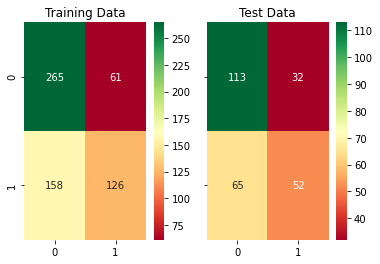

In [88]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict1)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict1)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [89]:
# Inference:
# Logistic regression
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 265 False Positive : 61
#False Negative : 158 True Positive : 126
#Test data:
#True Negative : 113 False Positive : 32
#False Negative : 65 True Positive : 52

# Classification Report of training and test data

In [90]:
print(classification_report(y_train, ytrain_predict1),'\n');
print(classification_report(y_test, ytest_predict1),'\n');


              precision    recall  f1-score   support

           0       0.63      0.81      0.71       326
           1       0.67      0.44      0.54       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610
 

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262
 



AUC for the Training Data: 0.667
AUC for the Test Data: 0.661


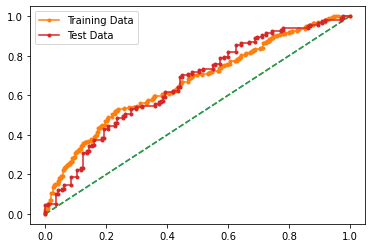

In [91]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lr = metrics.roc_auc_score(y_train,ytrain_predict_prob1[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lr)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lr = metrics.roc_auc_score(y_test,ytest_predict_prob1[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lr )

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [92]:
#Logistic regression
# Train Data:
### AUC: 66.7%
### Accuracy: 64%
### precision : 67%
#recall : 44%
#f1  :54%

# Test Data:
### AUC: 66.1%
### Accuracy: 63%
### precision  63
#recall : 44%
#f1 : 52%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting
#### The Precision and Recall metrics also almost similiar between training and test set.


In [93]:
best_model.coef_

array([[-1.85343157e-05, -8.97529371e-03,  6.63946756e-02,
         0.00000000e+00,  1.86667580e-01,  1.33177839e+00]])

In [94]:
print("The intercept for the model is :",best_model.intercept_)

The intercept for the model is : [-0.05269843]


In [95]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_model.coef_[0][idx]))

The coefficient for Salary is -1.8534315667025707e-05
The coefficient for age is -0.008975293705519546
The coefficient for educ is 0.06639467564981394
The coefficient for no_young_children is 0.0
The coefficient for no_older_children is 0.18666757986416826
The coefficient for foreign is 1.3317783895558775


In [96]:
#The coefficients for each of the independent attributes

# The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
# The coefficient for foreign is 1.33 which shows "foreign" variable is high positive correlation with "holiday_package" (dependent variables)
# If more foreign employees opted for holiday package ,no of employees opted for holiday_package will increase
# There is more negative correlation between "holiday package " and salary,age variables 


Feature: 0, Score: -0.00002
Feature: 1, Score: -0.00898
Feature: 2, Score: 0.06639
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.18667
Feature: 5, Score: 1.33178


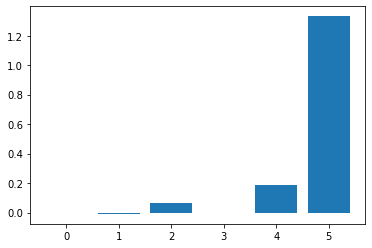

In [97]:
importance = best_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
#1.57584

In [98]:
feature_importances = (importance / sum(importance))*100

feature_importances

array([-1.17614958e-03, -5.69553691e-01,  4.21326965e+00,  0.00000000e+00,
        1.18455409e+01,  8.45119193e+01])

In [99]:
#1. foreign (+ve) – 84 % increase per unit

#2. educ (+ve) – 4.2 % increase per unit
#3. age (-ve) – .569 % decrease per unit
#5. no_older_children (+ve) -11.84 % decrease per unit

In [100]:
vif1 = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

C:\Users\sugan\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [101]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif1[i])
        i = i+1


Salary ---> 10.691328770445477
age ---> 7.883717090792149
educ ---> 9.289879244969368
no_young_children ---> nan
no_older_children ---> 1.8287587912872858
foreign ---> 1.3123489821120458


In [102]:
#foreign and no older children are important variable

In [103]:
metrics=classification_report(y_train, ytrain_predict1,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lr=round(df.loc["1"][0],2)
train_recall_lr=round(df.loc["1"][1],2)
train_f1_lr=round(df.loc["1"][2],2)
print ('LR_train_precision ',train_precision_lr)
print ('LR_train_recall ',train_recall_lr)
print ('LR_train_f1 ',train_f1_lr)


LR_train_precision  0.67
LR_train_recall  0.44
LR_train_f1  0.54


In [104]:
metrics=classification_report(y_test, ytest_predict1,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lr=round(df.loc["1"][0],2)
test_recall_lr=round(df.loc["1"][1],2)
test_f1_lr=round(df.loc["1"][2],2)
print ('LR_test_precision ',test_precision_lr)
print ('LR_test_recall ',test_recall_lr)
print ('LR_test_f1 ',test_f1_lr)


LR_test_precision  0.62
LR_test_recall  0.44
LR_test_f1  0.52


# LDA 

In [105]:
print("The intercept of the model is ",Lda_model.intercept_)

The intercept of the model is  [-0.07340127]


In [106]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, Lda_model.coef_[0][idx]))


The coefficient for Salary is -1.8319623552908965e-05
The coefficient for age is -0.009003817204418316
The coefficient for educ is 0.0651380279296207
The coefficient for no_young_children is -1.3864459965067275e-16
The coefficient for no_older_children is 0.1874710395626884
The coefficient for foreign is 1.3765145540963208


In [107]:
#foreign and no older children are important variable

In [108]:
importance = Lda_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: -0.00002
Feature: 1, Score: -0.00900
Feature: 2, Score: 0.06514
Feature: 3, Score: -0.00000
Feature: 4, Score: 0.18747
Feature: 5, Score: 1.37651


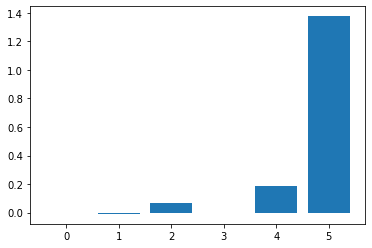

In [109]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [110]:
#1. foreign (+ve) – 84 % increase per unit

#2. educ (+ve) – 4.02 % increase per unit
#3. age (-ve) – .55 % decrease per unit
#5. no_older_children (+ve) -11.57 % decrease per unit

In [111]:
metrics=classification_report(y_train,pred_class_train,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lda=round(df.loc["1"][0],2)
train_recall_lda=round(df.loc["1"][1],2)
train_f1_lda=round(df.loc["1"][2],2)
print ('LDA_train_precision ',train_precision_lr)
print ('LDA_train_recall ',train_recall_lr)
print ('LDA_train_f1 ',train_f1_lr)


LDA_train_precision  0.67
LDA_train_recall  0.44
LDA_train_f1  0.54


In [112]:
metrics=classification_report(y_test,pred_class_test,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lda=round(df.loc["1"][0],2)
test_recall_lda=round(df.loc["1"][1],2)
test_f1_lda=round(df.loc["1"][2],2)
print ('LDA_test_precision ',test_precision_lr)
print ('LDA_test_recall ',test_recall_lr)
print ('LDA_test_f1 ',test_f1_lr)


LDA_test_precision  0.62
LDA_test_recall  0.44
LDA_test_f1  0.52


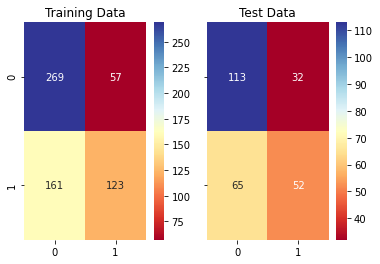

In [116]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='RdYlBu',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [117]:
# Inference:
#LDA
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 269 False Positive : 57
#False Negative : 161 True Positive : 123
#Test data:
#True Negative : 113 False Positive : 32
#False Negative : 65 True Positive : 52

In [118]:
print(classification_report(y_train, pred_class_train),'\n');
print(classification_report(y_test, pred_class_test),'\n');


              precision    recall  f1-score   support

           0       0.63      0.83      0.71       326
           1       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610
 

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       145
           1       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262
 



AUC for the Training Data: 0.591
AUC for the Test Data: 0.633


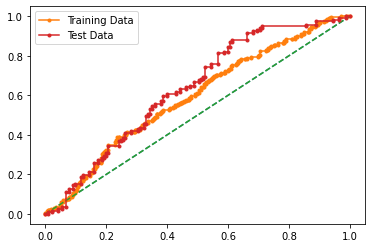

In [119]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lda  = metrics.roc_auc_score(y_train, pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lda)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train, pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lda = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % test_auc_lda)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [120]:
#Logistic regression
# Train Data:
### AUC: 59.1%
### Accuracy: 64%
### precision : 68%
#recall : 43%
#f1  :53%

# Test Data:
### AUC: 63.3%
### Accuracy: 63%
### precision  63
#recall : 44%
#f1 : 52%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting
#### The Precision and Recall metrics also almost similiar between training and test set.


In [121]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[accuracy_lr_train,train_auc_lr,train_recall_lr,train_precision_lr,train_f1_lr],
        'LR Test':[accuracy_lr_test,test_auc_lr,test_recall_lr,test_precision_lr,test_f1_lr],
        'LDA Train':[accuracy_lda_train,train_auc_lda,train_recall_lda,train_precision_lda,train_f1_lda],
        'LDA Test':[accuracy_lda_test,test_auc_lda,test_recall_lda,test_precision_lda,test_f1_lda]},index=index)   
                     
round(data,3)


,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.641,0.630,0.643,0.630
AUC,0.667,0.661,0.591,0.633
Recall,0.440,0.440,0.430,0.440
Precision,0.670,0.620,0.680,0.620
F1 Score,0.540,0.520,0.530,0.520


In [122]:
models_names={best_model:'Logistic Regression',Lda_model:'LDA'}

Area under the curve for Logistic Regression Model is 0.666864685042772
Area under the curve for LDA is 0.590976842650998


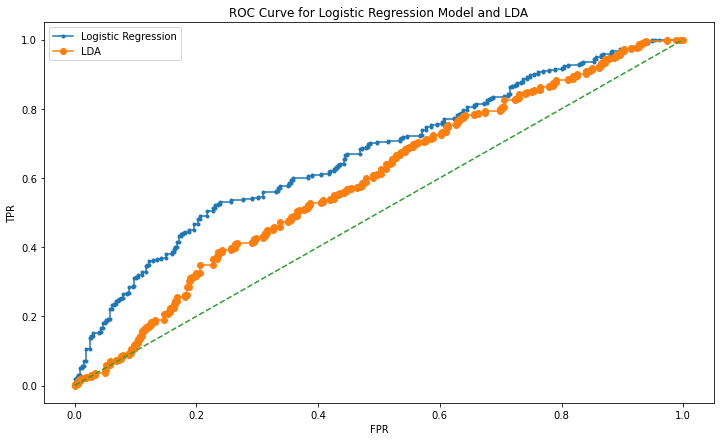

In [125]:
print('Area under the curve for Logistic Regression Model is',roc_auc_score(y_train,ytrain_predict_prob1[:,1]))
print('Area under the curve for LDA is',roc_auc_score(y_train, pred_prob_train[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_train,ytrain_predict_prob1[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_train, pred_prob_train[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')


plt.title('ROC Curve for {}'.format('Logistic Regression Model and LDA'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

Area under the curve for Logistic Regression Model is 0.6610079575596816
Area under the curve for LDA is 0.6329501915708813


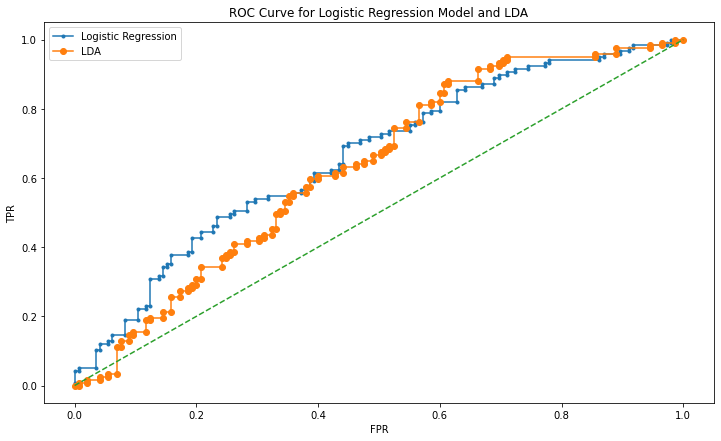

In [126]:
print('Area under the curve for Logistic Regression Model is',roc_auc_score(y_test,ytest_predict_prob1[:,1]))
print('Area under the curve for LDA is',roc_auc_score(y_test, pred_prob_test[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test,ytest_predict_prob1[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, pred_prob_test[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Logistic Regression Model and LDA'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.
